In [26]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import utils
from torch import optim
from torch.utils.data.sampler import SubsetRandomSampler

(1000,)
(1000, 2)


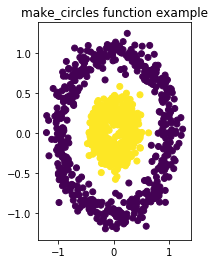

In [27]:
fig=plt.figure(1)  
x1,y1=datasets.make_circles(n_samples=1000, noise=0.1, random_state=1, factor=0.3)

print(y1.shape)
print(x1.shape)

plt.subplot(121)  
plt.title('make_circles function example')  
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1) 

Loss: 0.8354263305664062
Loss: 0.5439241528511047
Loss: 0.39179688692092896
Loss: 0.3507608473300934
Loss: 0.33318865299224854
Loss: 0.31503409147262573
Loss: 0.31501391530036926
Loss: 0.3133311867713928
Loss: 0.31888070702552795
Loss: 0.3183020055294037
Loss: 0.31414252519607544
Loss: 0.3134491741657257
Loss: 0.31378111243247986
Loss: 0.31329798698425293
Loss: 0.313457190990448
Loss: 0.3133073151111603


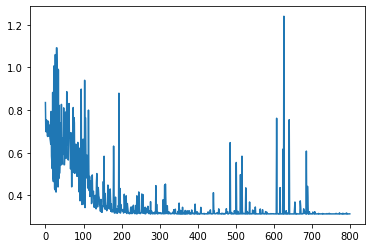

In [32]:
model = nn.Sequential(
    nn.Linear(2, 30, bias=True),
    nn.ReLU(),
    nn.Linear(30, 50, bias=True),
    nn.Sigmoid(),
    nn.Linear(50, 2, bias=True),
    nn.Softmax(1)
)


optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_func = nn.CrossEntropyLoss()

tensor_x = torch.FloatTensor(x1) # transform to torch tensors
tensor_y = torch.LongTensor(y1)

epoch = 1
index = 0
losses = []
batch_size = 1

train_radio = 0.8
data_set_count = tensor_x.shape[0]
indices = list(range(data_set_count))
np.random.shuffle(indices)
split = int(np.floor(data_set_count * train_radio))
train_indices = indices[:split]
test_indices = indices[split:]

train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

my_dataset = utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
train_data = utils.data.DataLoader(my_dataset, batch_size=batch_size, sampler=train_sampler) 
test_data = utils.data.DataLoader(my_dataset, batch_size=batch_size, sampler=test_sampler) 


for _ in range(epoch):
    for data, label in train_data:
        
        optimizer.zero_grad()
        result = model(data)
        loss = loss_func(result, label)
        loss.backward()
        optimizer.step()
        
        if(index % 50 == 0):
            print("Loss: {}".format(loss.item()))
        losses.append(loss.item())
        index += 1
plt.plot(range(len(losses)), losses)
